In [44]:
import numpy as np
from matplotlib import pyplot as plt


# computes the E-field magnitude across the 2d grid taking BC into account 
def compute_electric_field(Phi):
    N = Phi.shape[0]  # Grid size (N x N) and step
    h = 1 / (N - 1)   
    
    # Initialize arrays for E_x, E_y for the final E_magnitude
    E_x = np.zeros_like(Phi)
    E_y = np.zeros_like(Phi)
    
    # Compute E_x and E_y using central differences for interior points
    for i in range(1, N-1):
        for j in range(1, N-1):
            E_x[i, j] = - (Phi[i+1, j] - Phi[i-1, j]) / (2 * h)
            E_y[i, j] = - (Phi[i, j+1] - Phi[i, j-1]) / (2 * h)
    
    # Handle boundary points with forward/backward differences
    E_x[0, :] = - (Phi[1, :] - Phi[0, :]) / h
    E_x[-1, :] = - (Phi[-1, :] - Phi[-2, :]) / h
    E_y[:, 0] = - (Phi[:, 1] - Phi[:, 0]) / h
    E_y[:, -1] = - (Phi[:, -1] - Phi[:, -2]) / h
    
    # Calculate the magnitude of the electric field, sqrt is already positive so modulus skipped here
    E_magnitude = np.sqrt(E_x**2 + E_y**2)
    
    return E_magnitude


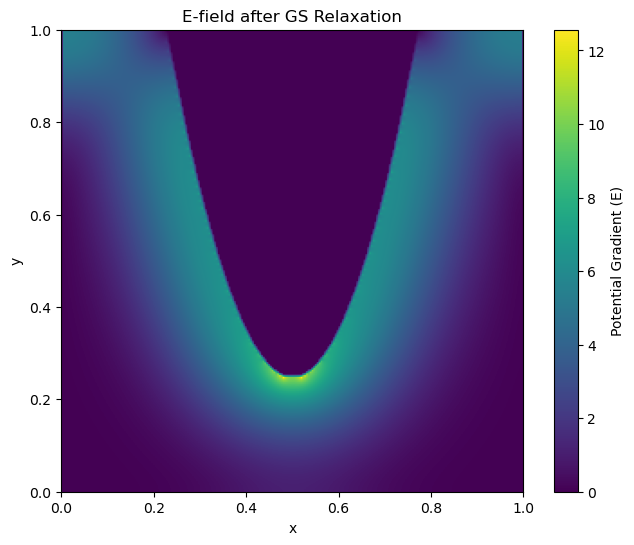

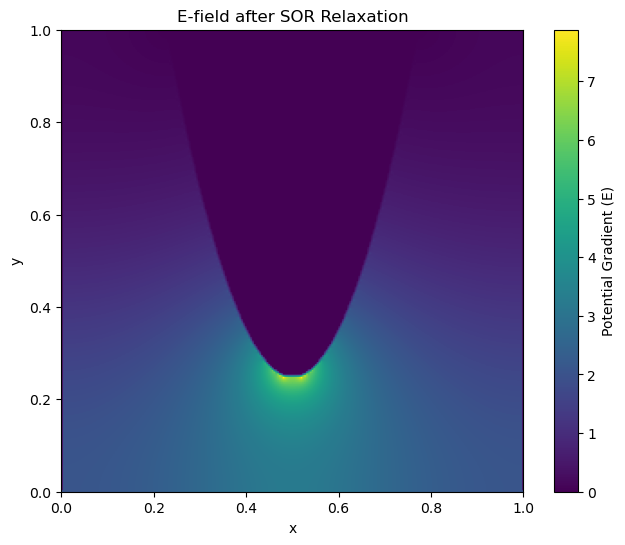

In [45]:
# loading the exported phi grids from previous part
Phi_gs = np.load("phi-gs.npy")
Phi_sor = np.load("phi-sor.npy")

E_field_gs = compute_electric_field(Phi_gs)
E_field_sor = compute_electric_field(Phi_sor)

# Visualization of the relaxed potential
plt.figure(figsize=(8, 6))
plt.imshow(E_field_gs.T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
plt.colorbar(label='Potential Gradient (E)')
plt.title(f'E-field after GS Relaxation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.close()

# Visualization of the relaxed potential
plt.figure(figsize=(8, 6))
plt.imshow(E_field_sor.T, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
plt.colorbar(label='Potential Gradient (E)')
plt.title(f'E-field after SOR Relaxation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.close()




In [46]:
# printing the max value of the field in the 2D field grid
np.max(E_field_sor)

7.880641311743572

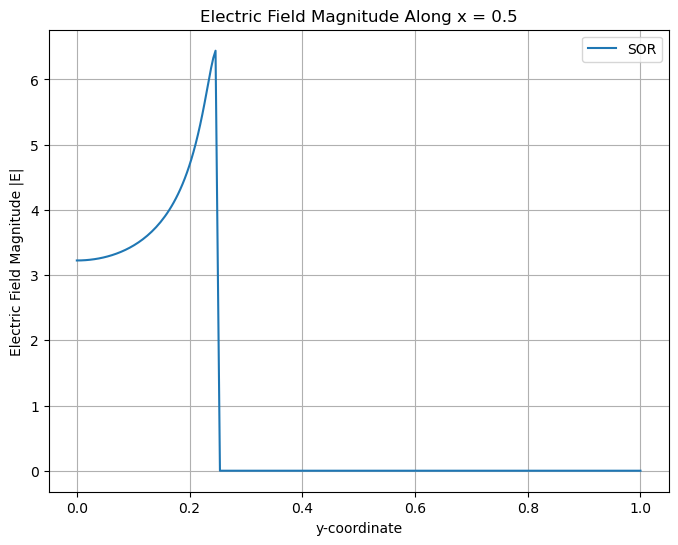

In [47]:
# Plotting the E-field strength along the x=0.5 line against the y-coordinate
N = E_field_sor.shape[0]

x_mid = N // 2 # index corresponding to x=0.5
E_mid_sor = E_field_sor[x_mid, :] # Extracting the column along the x=0.5 line
# E_mid_gs = E_field_gs[x_mid, :]

y = np.linspace(0, 1, N) # to plot against the entire y-range

# Plotting the electric field along the vertical line
plt.figure(figsize=(8, 6))
plt.plot(y, E_mid_sor, label = "SOR")
# plt.plot(y, E_mid_gs, label = "GS") 
plt.legend()
plt.title('Electric Field Magnitude Along x = 0.5')
plt.xlabel('y-coordinate')
plt.ylabel('Electric Field Magnitude |E|')
plt.grid(True)
plt.show()